# Demo

In [2]:
import pandas as pd
pd.options.plotting.backend = "plotly"

In [3]:
import yfinance as yf

In [6]:
data = yf.download(tickers = "SPY AAPL GOOG MSFT",  # list of tickers
                   period = "10y",                   # time period
                   interval = "1d",                 # trading interval
                   prepost = False,                 # download pre/post market hours data?
                   repair = True)                   # repair obvious price errors e.g. 100x?

[*********************100%***********************]  4 of 4 completed


In [8]:
prices = data["Adj Close"]

In [9]:
from cvx.simulator.portfolio import build_portfolio

In [10]:
portfolio = build_portfolio(prices=prices)

In [12]:
capital = 1e6

In [27]:
for before, now in portfolio:
    assert before < now
    portfolio[now] = 0.25 * capital / portfolio.prices.loc[now]

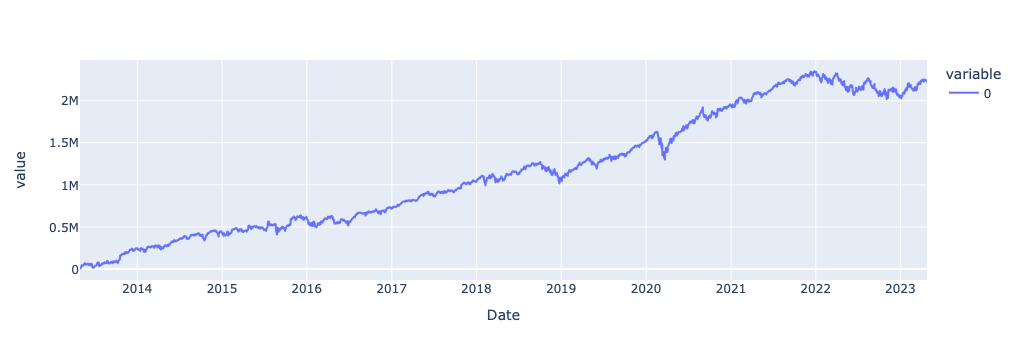

In [28]:
portfolio.profit.cumsum().plot()

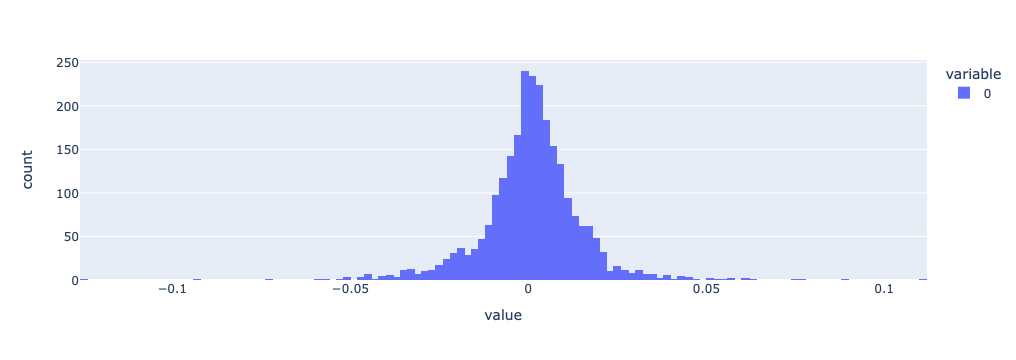

In [30]:
(portfolio.profit / capital).hist()